In [3]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

Check the number of rows and columns and print column names.

In [70]:
%%time
# change the path if needed
path = '2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 28.1 s, sys: 834 ms, total: 28.9 s
Wall time: 29 s


In [71]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


Print first 5 rows of the dataset.

In [72]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


Transpose the frame to see all features at once.

In [9]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


Examine data types of all features and total dataframe size in memory.

In [10]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               uint16 
 1   Month              uint8  
 2   DayofMonth         uint8  
 3   DayOfWeek          uint8  
 4   DepTime            float16
 5   UniqueCarrier      object 
 6   FlightNum          uint16 
 7   ArrDelay           float16
 8   DepDelay           float16
 9   Origin             object 
 10  Dest               object 
 11  Distance           uint16 
 12  Cancelled          uint8  
 13  CancellationCode   object 
 14  CarrierDelay       float16
 15  WeatherDelay       float16
 16  NASDelay           float16
 17  SecurityDelay      float16
 18  LateAircraftDelay  float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


Get basic statistics of each feature.

In [11]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


Count unique Carriers and plot their relative share of flights:

In [12]:
flights_df['UniqueCarrier'].nunique()

20

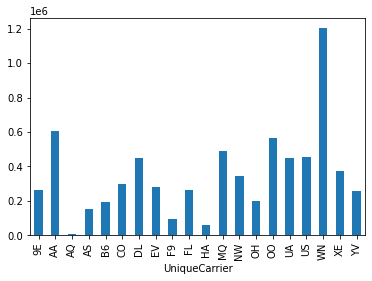

In [13]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

We can also group by category/categories in order to calculate different aggregated statistics.

For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.

In [14]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

Another way:

In [15]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

Number of flights by days of week and months:

In [16]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


It can also be handy to color such tables in order to easily notice outliers:

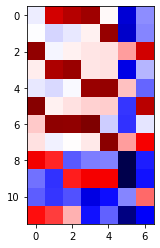

In [17]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

Flight distance histogram:

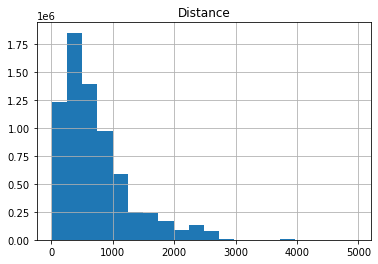

In [18]:
flights_df.hist('Distance', bins=20);

Making a histogram of flight frequency by date.

In [19]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [20]:
num_flights_by_date = flights_df.groupby('Date').size()

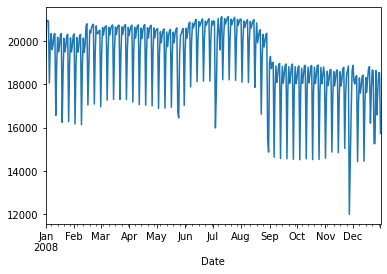

In [21]:
num_flights_by_date.plot();

Do you see a weekly pattern above? And below?

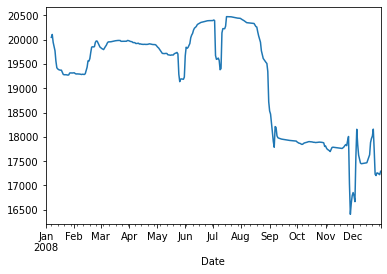

In [25]:
num_flights_by_date.rolling(window=7).mean().plot();

1. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?

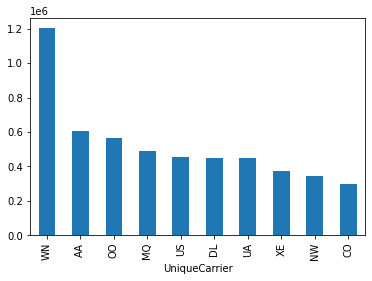

In [67]:
flights_df.groupby('UniqueCarrier').size().sort_values(ascending=False).iloc[:10].plot(kind='bar')

2. Plot distributions of flight cancellation reasons (CancellationCode).

What is the most frequent reason for flight cancellation? (Use this link to translate codes into reasons)

Weather


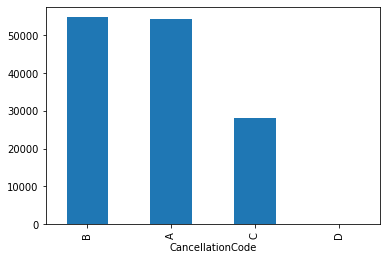

In [82]:
flights_df.groupby('CancellationCode').size().sort_values(ascending=False).plot(kind='bar')
df2 = flights_df[(flights_df['Cancelled'] > 0)]
carrier = df2[(df2['CancellationCode'] == 'A')].shape[0]
weather = df2[(df2['CancellationCode'] == 'B')].shape[0]
NAS = df2[(df2['CancellationCode'] == 'C')].shape[0]
security = df2[(df2['CancellationCode'] == 'D')].shape[0]
reasons = {'Carrier': carrier, 'Weather': weather, 'National Air System': NAS, 'Security': security}
for key, value in reasons.items():
    if value == max(reasons.values()):
        print(key)

3. Which route is the most frequent, in terms of the number of flights?

(Take a look at 'Origin' and 'Dest' features. Consider A->B and B->A directions as different routes)

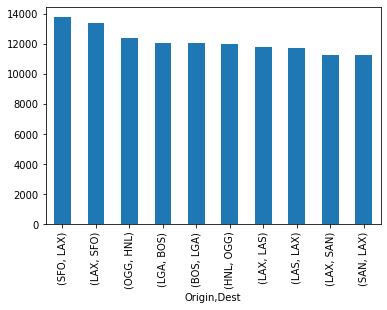

In [88]:
flights_df.groupby(['Origin','Dest']).size().sort_values(ascending=False).iloc[:10].plot(kind='bar')

4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.

In [117]:
local_df = flights_df[flights_df['DepDelay'] > 0].groupby(['Origin', 'Dest']).size().sort_values(ascending=False).head()
df2  = flights_df[(flights_df['DepDelay'] > 0) & (flights_df['WeatherDelay'] > 0)]
routes = tuple(dict(local_df).keys())
total = 0
for keys in routes:
    total += df2[(df2['Origin'] == keys[0]) & (df2['Dest'] == keys[1])]['WeatherDelay'].count()
total

668

5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.

Choose all correct statements:

- Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
- Flights are uniformly distributed within time interval [0-23].
- In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

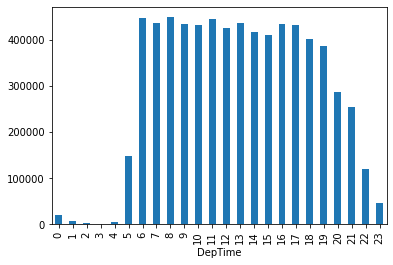

In [49]:
df2 = flights_df[flights_df['DepTime'].notna()][['DepTime', 'Year']]
df2['DepTime'] = df2.DepTime.apply(lambda x: int(x // 100) % 24)
df2.groupby('DepTime').size().plot(kind='bar')

6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.

Choose all correct statements:

- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

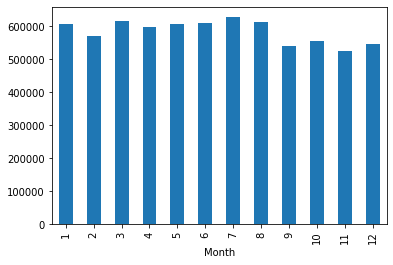

In [50]:
flights_df.groupby('Month').size().plot(kind='bar')

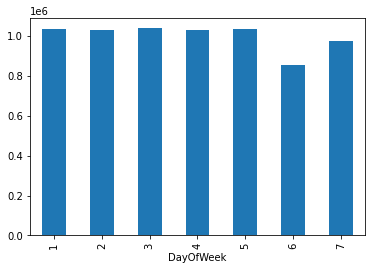

In [51]:
flights_df.groupby('DayOfWeek').size().plot(kind='bar')

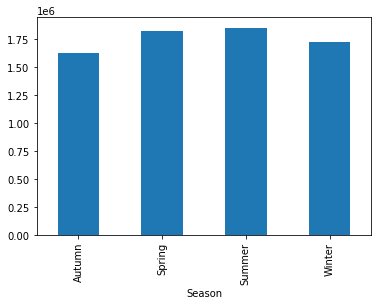

In [97]:
df2 = flights_df.copy()
df2['Season'] = df2['Month'].astype(object)
df2['Season'] = df2.Season.map({1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring',
                                6:'Summer', 7:'Summer', 8:'Summer', 9:'Autumn', 10:'Autumn', 11:'Autumn', 12:'Winter'})
df2.groupby('Season').size().plot(kind='bar', label='flights')

7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.

Choose all correct statements:

- December has the highest rate of cancellations due to weather.
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

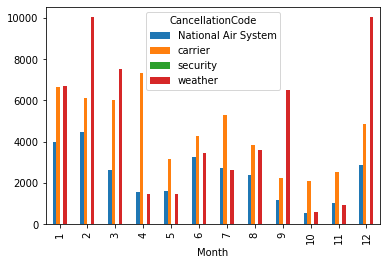

In [111]:
df2 = flights_df[(flights_df['Cancelled'] > 0)][['CancellationCode', 'Month']]
df2['CancellationCode'] = df2.CancellationCode.map({'A': 'carrier', 'B':'weather', 
                                                    'C':'National Air System', 'D': 'security'})
df2.groupby('CancellationCode')['Month'].value_counts().unstack(0).plot(kind='bar')

8. Which month has the greatest number of cancellations due to Carrier?

 - May
 - January
 - September
 - April

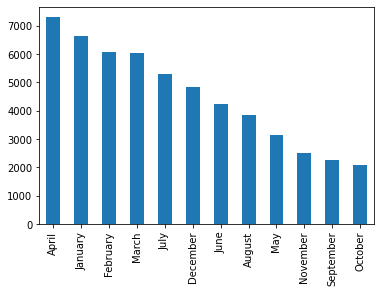

In [117]:
df2 = flights_df[(flights_df['Cancelled'] > 0)][['CancellationCode', 'Month']]
df2['CancellationCode'] = df2.CancellationCode.map({'A': 'carrier', 'B':'weather', 
                                                    'C':'National Air System', 'D': 'security'})
months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df2['Month'] = df2.Month.map(months)
df2[(df2['CancellationCode'] == 'carrier')]['Month'].value_counts().plot(kind = 'bar')

9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.

 - 9E
 - EV
 - HA
 - AA

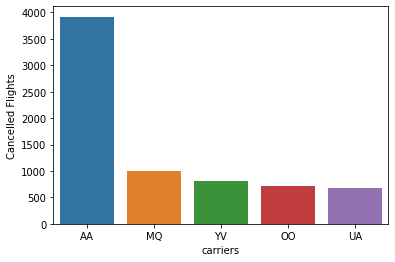

In [162]:
df2 = flights_df[(flights_df['Cancelled'] > 0)][['CancellationCode', 'Month', 'UniqueCarrier']]
df2['CancellationCode'] = df2.CancellationCode.map({'A': 'carrier', 'B':'weather', 
                                                    'C':'National Air System', 'D': 'security'})
months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May',
          6:'June', 7:'July', 8:'August', 9:'September', 10:'October',
          11:'November', 12:'December'}
df2['Month'] = df2.Month.map(months)
carriers = df2[(df2['Month'] == 'April')
              ].UniqueCarrier.value_counts().sort_values(ascending = False).head(5).index.values
values = list(df2[(df2['Month'] == 'April')
              ].UniqueCarrier.value_counts().sort_values(ascending = False).head(5).values)
d = {'carriers': carriers, 'Cancelled Flights': values}
df3 = pd.DataFrame(data=d)
sns.barplot(y="Cancelled Flights", x="carriers", data=df3)

10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay'). Boxplots can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.

 - EV
 - OO
 - AA
 - AQ

,ArrDelay,DepDelay
UniqueCarrier,,
AQ,10.6875,10.007812


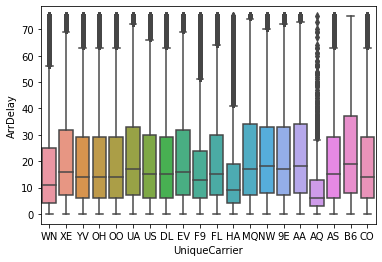

In [185]:
arr_out = int(flights_df.ArrDelay.quantile(0.95))
dep_out = int(flights_df.DepDelay.quantile(0.95))
df2 = flights_df[((flights_df['ArrDelay'] >= 0) & (flights_df['ArrDelay'] <= arr_out))
                 & ((flights_df['DepDelay'] >= 0) & (flights_df['DepDelay'] <= dep_out))][
                     ['UniqueCarrier', 'ArrDelay', 'DepDelay']]
sns.boxplot(y='ArrDelay', x='UniqueCarrier', data = df2, orient='v')

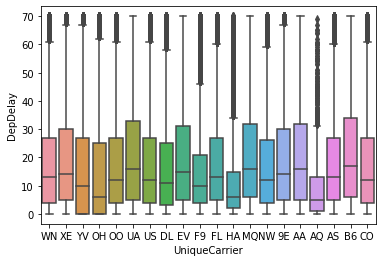

In [186]:
sns.boxplot(y='DepDelay', x='UniqueCarrier', data=df2, orient='v')

In [193]:
df2.groupby('UniqueCarrier').mean().sort_values(
    by = ['ArrDelay', 'DepDelay'], ascending = True).head(1)

,ArrDelay,DepDelay
UniqueCarrier,,
AQ,10.6875,10.007812
